C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


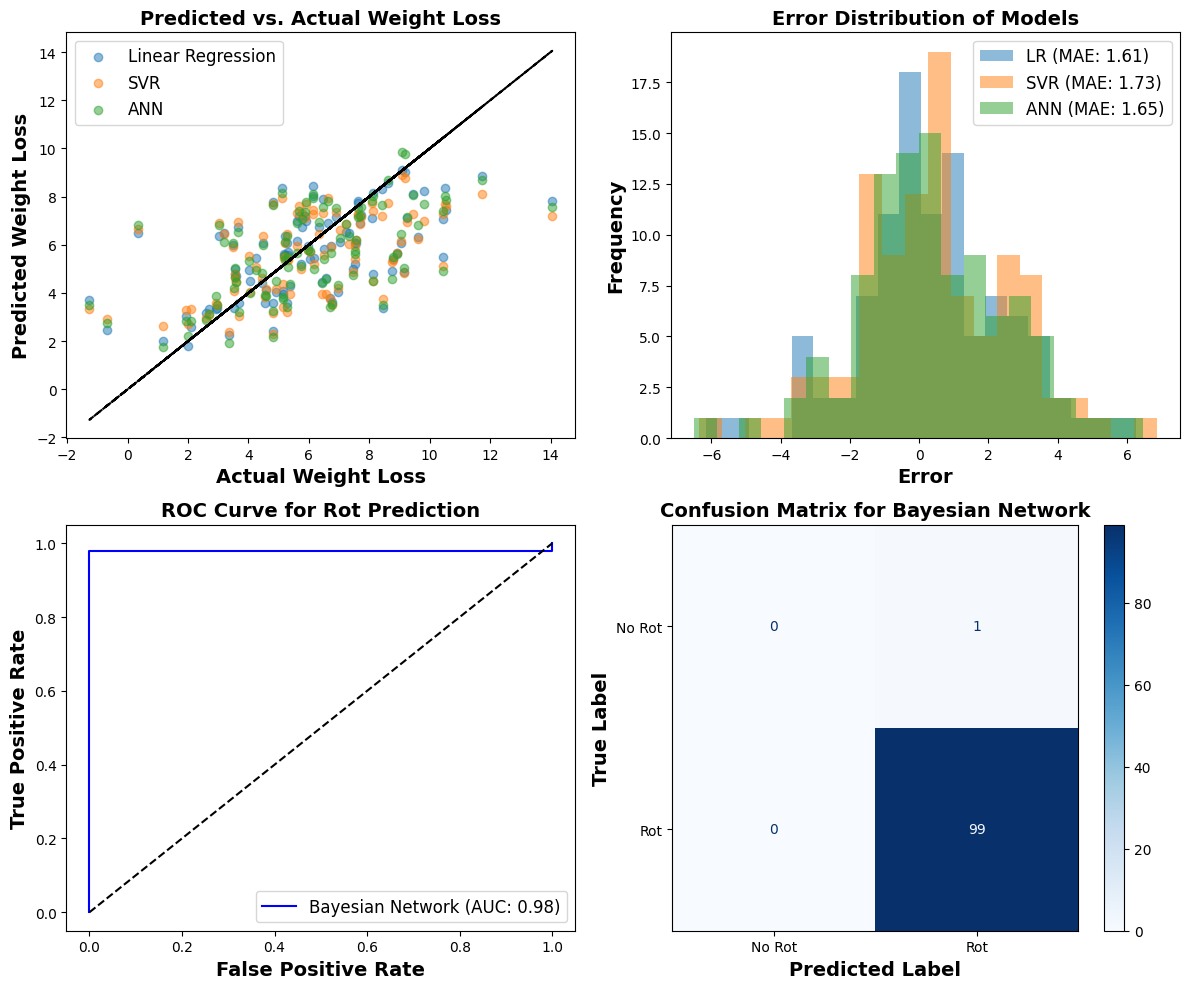

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

# Generate synthetic dataset
np.random.seed(42)
n_samples = 500
T = np.random.uniform(5, 30, n_samples)
H = np.random.uniform(40, 90, n_samples)
S = np.random.uniform(5, 60, n_samples)
W = 0.05 * T + 0.02 * H + 0.1 * S + np.random.normal(0, 2, n_samples)
R_prob = 1 / (1 + np.exp(-0.1 * (T + H + S + W - 50)))
R = (R_prob > np.random.rand(n_samples)).astype(int)

df = pd.DataFrame({'T': T, 'H': H, 'S': S, 'W': W, 'R': R})

X = df[['T', 'H', 'S']]
y_W = df['W']
y_R = df['R']

X_train, X_test, y_W_train, y_W_test = train_test_split(X, y_W, test_size=0.2, random_state=42)
_, _, y_R_train, y_R_test = train_test_split(X, y_R, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression().fit(X_train, y_W_train)
svr = SVR(kernel='rbf').fit(X_train_scaled, y_W_train)
ann = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42).fit(X_train_scaled, y_W_train)

y_W_pred_lr = lr.predict(X_test)
y_W_pred_svr = svr.predict(X_test_scaled)
y_W_pred_ann = ann.predict(X_test_scaled)

mae_lr = mean_absolute_error(y_W_test, y_W_pred_lr)
mae_svr = mean_absolute_error(y_W_test, y_W_pred_svr)
mae_ann = mean_absolute_error(y_W_test, y_W_pred_ann)

nb = GaussianNB().fit(X_train, y_R_train)
y_R_pred_nb = nb.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_R_test, y_R_pred_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
y_R_pred_class_nb = (y_R_pred_nb > 0.5).astype(int)
cm_nb = confusion_matrix(y_R_test, y_R_pred_class_nb)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Scatter Plot
axes[0, 0].scatter(y_W_test, y_W_pred_lr, label='Linear Regression', alpha=0.5)
axes[0, 0].scatter(y_W_test, y_W_pred_svr, label='SVR', alpha=0.5)
axes[0, 0].scatter(y_W_test, y_W_pred_ann, label='ANN', alpha=0.5)
axes[0, 0].plot(y_W_test, y_W_test, color='black', linestyle='dashed')
axes[0, 0].set_xlabel("Actual Weight Loss", fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel("Predicted Weight Loss", fontsize=14, fontweight='bold')
axes[0, 0].set_title("Predicted vs. Actual Weight Loss", fontsize=14, fontweight='bold')
axes[0, 0].legend(fontsize=12)

# Error Distribution
errors_lr = y_W_test - y_W_pred_lr
errors_svr = y_W_test - y_W_pred_svr
errors_ann = y_W_test - y_W_pred_ann
axes[0, 1].hist(errors_lr, bins=20, alpha=0.5, label=f'LR (MAE: {mae_lr:.2f})')
axes[0, 1].hist(errors_svr, bins=20, alpha=0.5, label=f'SVR (MAE: {mae_svr:.2f})')
axes[0, 1].hist(errors_ann, bins=20, alpha=0.5, label=f'ANN (MAE: {mae_ann:.2f})')
axes[0, 1].set_xlabel("Error", fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel("Frequency", fontsize=14, fontweight='bold')
axes[0, 1].set_title("Error Distribution of Models", fontsize=14, fontweight='bold')
axes[0, 1].legend(fontsize=12)

# ROC Curve
axes[1, 0].plot(fpr_nb, tpr_nb, label=f'Bayesian Network (AUC: {roc_auc_nb:.2f})', color='blue')
axes[1, 0].plot([0, 1], [0, 1], linestyle='--', color='black')
axes[1, 0].set_xlabel("False Positive Rate", fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel("True Positive Rate", fontsize=14, fontweight='bold')
axes[1, 0].set_title("ROC Curve for Rot Prediction", fontsize=14, fontweight='bold')
axes[1, 0].legend(fontsize=12)

# Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=['No Rot', 'Rot']).plot(ax=axes[1, 1], cmap='Blues')
axes[1, 1].set_title("Confusion Matrix for Bayesian Network", fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel("Predicted Label", fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel("True Label", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig("prediction_results.jpg", dpi=300, bbox_inches='tight')  # Save high-quality JPG
plt.show()

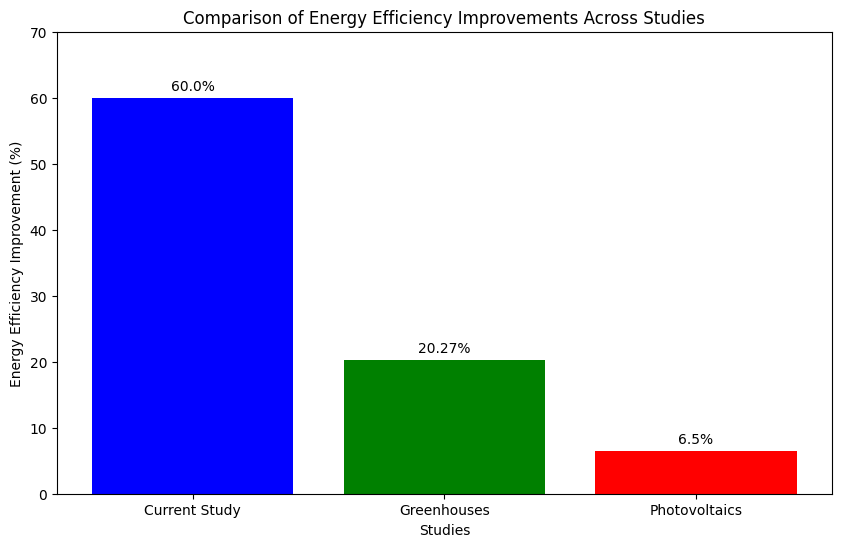

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Energy consumption parameters
P_blower = 0.5  # Power consumption of blower in kW
t_baseline = 10  # Baseline operation time in hours/day
t_optimized = 4  # Optimized operation time in hours/day
C_electricity = 0.12  # Cost of electricity in $/kWh

# Energy consumption calculations
E_baseline = P_blower * t_baseline  # Baseline energy consumption in kWh/day
E_optimized = P_blower * t_optimized  # Optimized energy consumption in kWh/day
Delta_E = E_baseline - E_optimized  # Energy savings in kWh/day
Savings_energy = Delta_E * C_electricity  # Daily energy cost savings in $

# Profit yield parameters
m_total = 1000  # Total crop mass in kg
p = 2  # Price per kg of crop in $
S_baseline = 0.10  # Spoilage percentage without optimization
S_optimized = 0.05  # Spoilage percentage with optimization

# Profit calculations
m_saved = m_total * (S_baseline - S_optimized)  # Reduction in spoilage mass in kg
Delta_Profit = m_saved * p  # Increase in profit due to reduced spoilage in $
Total_Profit = Delta_Profit + Savings_energy * 30  # Monthly total profit

# Comparative energy efficiency data from studies
studies = {
    "Current Study": 60,  # 60% energy savings
    "Greenhouses": 20.27,  # 2.27% energy savings
    "Photovoltaics": 6.5,  # 6.5% energy improvement
}

# Plotting energy efficiency comparison
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(studies.keys(), studies.values(), color=['blue', 'green', 'red'])

# Adding data labels
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

ax.set_xlabel('Studies')
ax.set_ylabel('Energy Efficiency Improvement (%)')
ax.set_title('Comparison of Energy Efficiency Improvements Across Studies')
plt.ylim(0, max(studies.values()) + 10)
plt.show()


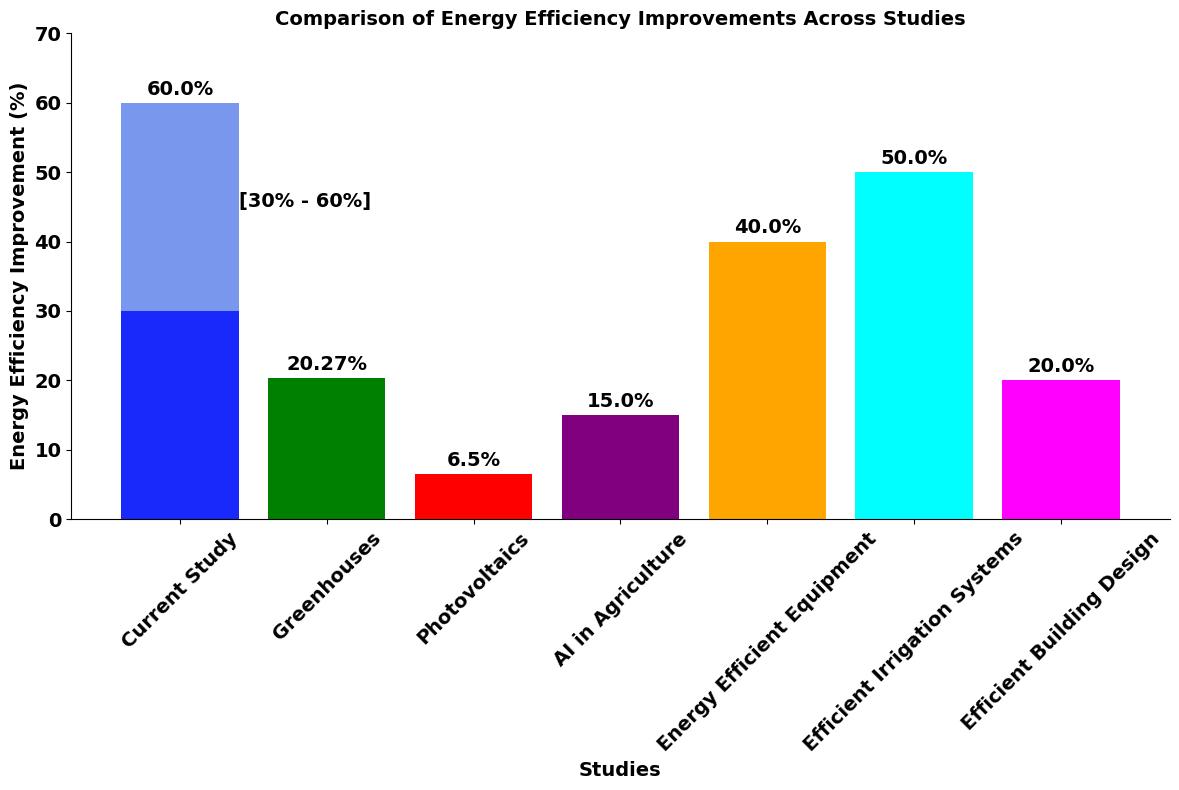

In [17]:
import matplotlib.pyplot as plt

# Comparative energy efficiency data from various studies
studies = {
    "Current Study": 60,  # 60% energy savings (Potential Growth from 30% to 60%)
    "Greenhouses": 20.27,
    "Photovoltaics": 6.5,
    "AI in Agriculture": 15,
    "Energy Efficient Equipment": 40,
    "Efficient Irrigation Systems": 50,
    "Efficient Building Design": 20
}

fig, ax = plt.subplots(figsize=(12, 8))

# Colors for bars
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta']
bars = ax.bar(studies.keys(), studies.values(), color=colors)

# Overlay shaded area for "Potential Growth Zone" in "Current Study"
current_study_index = list(studies.keys()).index("Current Study")
ax.bar("Current Study", 30, color='skyblue', alpha=0.2)  # Base level at 30%
ax.bar("Current Study", 30, bottom=30, color='lightblue', alpha=0.7)  # Growth zone

# Adding data labels
for bar, label in zip(bars, studies.keys()):
    height = bar.get_height()
    ax.annotate(f'{height}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=14, fontweight='bold')

# Adding bracket beside the "Current Study" bar
bracket_text = "[30% - 60%]"
ax.text(current_study_index + 0.4, 45, bracket_text, 
        fontsize=14, fontweight='bold', color='black', ha='left')

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Labels and Title with Bold Formatting
ax.set_xlabel('Studies', fontsize=14, fontweight='bold')
ax.set_ylabel('Energy Efficiency Improvement (%)', fontsize=14, fontweight='bold')
ax.set_title('Comparison of Energy Efficiency Improvements Across Studies', fontsize=14, fontweight='bold')

# Adjustments
plt.ylim(0, max(studies.values()) + 10)
plt.xticks(rotation=45, fontsize=14, fontweight='bold')  # Bold x-axis labels
plt.yticks(fontsize=14, fontweight='bold')  # Bold y-axis labels

plt.tight_layout()
plt.savefig("comparison.jpg", dpi=300, bbox_inches='tight')  # Save high-quality JPG
plt.show()


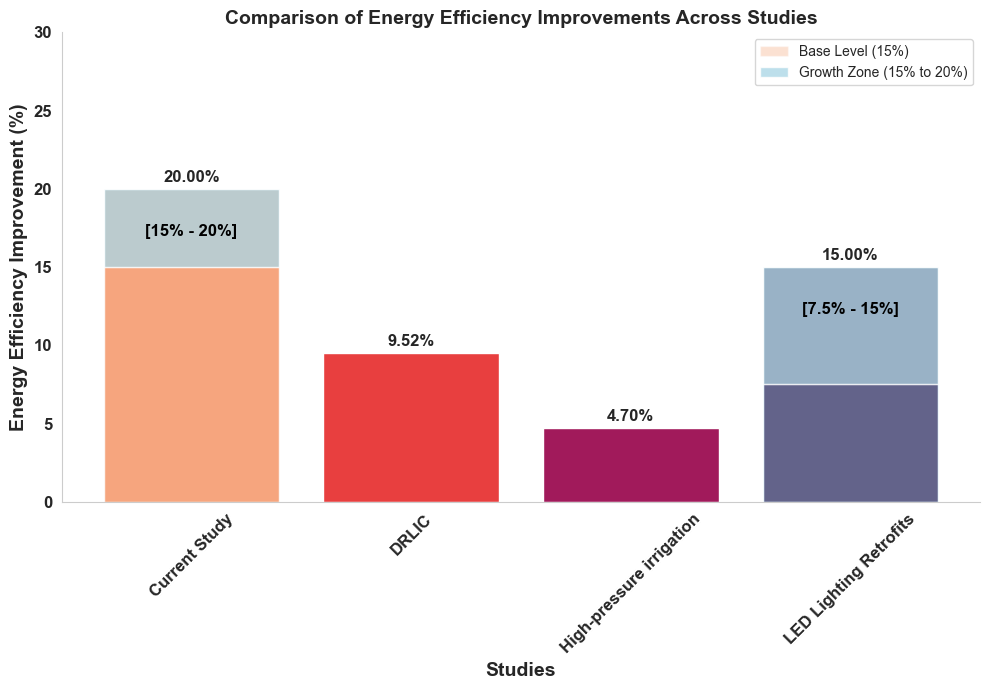

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and color palette
sns.set_style("whitegrid")
sns.set_palette("rocket_r")

# Comparative energy efficiency data from various studies
studies = {
    "Current Study": 20,  # 60% energy savings (Potential Growth from 30% to 60%)
    "DRLIC": 9.52,
    "High-pressure irrigation": 4.7,
    "LED Lighting Retrofits": 15
}

fig, ax = plt.subplots(figsize=(10, 7))

# Create a bar plot with the "rocket_r" color palette
bars = ax.bar(studies.keys(), studies.values(), color=sns.color_palette("rocket_r", len(studies)))

# Overlay shaded area for "Potential Growth Zone" in "Current Study"
current_study_index = list(studies.keys()).index("Current Study")

# First Shed (Base Level)
ax.bar("Current Study", 15, alpha=0.4, label='Base Level (15%)')  # Lighter shade for base

# Second Shed (Growth Zone)
ax.bar("Current Study", 5, bottom=15, color='lightblue', alpha=0.8, label='Growth Zone (15% to 20%)')  # Darker shade for growth

# Overlay shaded area for "Potential Growth Zone" in "LED Lighting Retrofits"
led_study_index = list(studies.keys()).index("LED Lighting Retrofits")

# First Shed (Base Level)
ax.bar("LED Lighting Retrofits", 7.5, color='skyblue', alpha=0.4)  # Lighter shade for base

# Second Shed (Growth Zone)
ax.bar("LED Lighting Retrofits", 7.5, bottom=7.5, color='lightblue', alpha=0.8)  # Darker shade for growth

# Adding data labels
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=12, fontweight='bold')

# Adding bracket beside the "Current Study" bar
bracket_text = "[15% - 20%]"
ax.text(current_study_index, 17, bracket_text, 
        fontsize=12, fontweight='bold', color='black', ha='center')

# Adding bracket beside the "LED Lighting Retrofits" bar
led_text = "[7.5% - 15%]"
ax.text(led_study_index, 12, led_text, 
        fontsize=12, fontweight='bold', color='black', ha='center')

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Labels and Title with Bold Formatting
ax.set_xlabel('Studies', fontsize=14, fontweight='bold')
ax.set_ylabel('Energy Efficiency Improvement (%)', fontsize=14, fontweight='bold')
ax.set_title('Comparison of Energy Efficiency Improvements Across Studies', fontsize=14, fontweight='bold')

# Legend
ax.legend()  # Add legend to explain the shaded areas

ax.grid(False)

# Adjustments
plt.ylim(0, max(studies.values()) + 10)
plt.xticks(rotation=45, fontsize=12, fontweight='bold')  # Bold x-axis labels
plt.yticks(fontsize=12, fontweight='bold')  # Bold y-axis labels

plt.tight_layout()
plt.savefig("comparison.jpg", dpi=300, bbox_inches='tight')  # Save high-quality JPG
plt.show()

<Figure size 640x480 with 0 Axes>